In [14]:
#module import
#modules have been given their own cell to avoid having to re-define network or
#perform other operations after terminating runtime sessions


#tensorflow 2.0 modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

#helper modules
import numpy as np
import matplotlib.pyplot as plt

#dataset module
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

ImportError: ignored

In [0]:
#alternate tensorflow data loader and pipeline


ds_train = tfds.load(name='cifar10', split='train')
ds_test = tfds.load(name='cifar10', split='test')

#extend dataset, shuffle, and split into batches
ds_train = ds_train.repeat().shuffle(1024).batch(32)

In [5]:
#data loader and normalizer


#cifar = tf.keras.datasets.cifar10

(imtrain, labtrain), (imtest, labtest) = datasets.cifar10.load_data()
#normalize pixel values
imtrain, imtest = imtrain / 255.0, imtest / 255.0

#labels do not inherently map to names, so we pre-define them to match a label vector
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#check to see if GPU is available
print(tf.config.list_physical_devices('GPU'))

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
#network definition


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 4, 4, 64)         

In [25]:
#compile and train model

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(imtrain, labtrain, epochs=20, validation_data=(imtest, labtest))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8712 - accuracy: 0.7021 - val_loss: 1.0351 - val_accuracy: 0.6701
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8215 - accuracy: 0.7190 - val_loss: 0.9079 - val_accuracy: 0.6939
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7714 - accuracy: 0.7335 - val_loss: 0.9896 - val_accuracy: 0.7172
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7564 - accuracy: 0.7384 - val_loss: 1.0026 - val_accuracy: 0.7167
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7422 - accuracy: 0.7451 - val_loss: 0.8721 - val_accuracy: 0.7140
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7309 - accuracy: 0.7467 - val_loss: 0.8389 - val_accuracy: 0.7093
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7032 - accuracy: 0.7556 - val_loss: 0.8433 - val_accuracy:

313/313 - 1s - loss: 0.8034 - accuracy: 0.7574


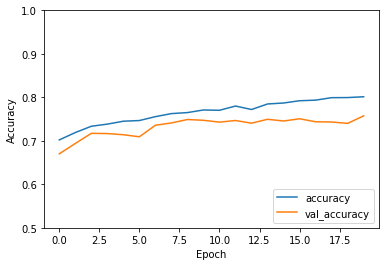

In [26]:
#performance evaluation cell

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(imtest,  labtest, verbose=2)